# ENGR 891: Programming Assignment #3
## Part A: 
### Pre-processing

### Import the packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import seaborn as sns

### Load data

In [2]:
# Load the CSV file as a pandas data frame object
df = pd.read_csv('winequality-white.csv', header = 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Check if there is a NAN in data set, clean the data if it is True

In [3]:
# Check if there is a NAN in data set, clean the data if it is True
df.isna().values.any()

False

### Create a data frame object for the features and another data frame object for the target

In [4]:
# Create a data frame object for the features and another data frame object for the target
df_features = df.drop(columns=['quality'])  # Data frame containing all features excluding the target & id 
df_target = df['quality']# Data frame containing the target 
print(df_target.astype)

<bound method NDFrame.astype of 0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64>


### Visualize Class Distribution

/Users/jing/opt/anaconda3/envs/am_keras_tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


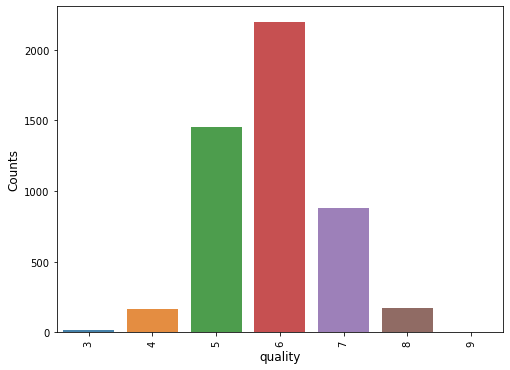

In [5]:
label_counts = df.quality.value_counts()
plt.figure(figsize = (8,6))
sns.barplot(label_counts.index, label_counts.values, alpha=0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('quality', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

### Feature Selection: using pearson correlation

In [6]:
# Variable Correlations with the target 
most_correlated = df.corr().abs()['quality'].sort_values(ascending=False) # the absolute value
# Maintain the top 11 most correlation features with target
most_correlated = most_correlated[:12]
print("Most Correlated Features:\n")
print(most_correlated)

Most Correlated Features:

quality                 1.000000
alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
free sulfur dioxide     0.008158
Name: quality, dtype: float64


### Find the optimal features

In [7]:
# Case 1 has the most correlated 10 features test accuracy (best of trials)
df_case1 = df[['alcohol','density','chlorides','volatile acidity','total sulfur dioxide','fixed acidity','pH','residual sugar','sulphates','citric acid']]

### Convert the above two data frame objects into two NumPy arrays¶

In [8]:
# Convert the above two data frame objects into two NumPy arrays
X = np.asarray(df_case1) # Data Matrix containing optimal features excluding the target
y = np.asarray(df_target) # Data Matrix of the target

### Convert the target array type into “int”

In [9]:
# Convert the target array type into “int”.
y = y.astype(int)
print(X.shape)
print(y.shape)
print("\nX data type: ", X.dtype)
print("y data type: ", y.dtype)

(4898, 10)
(4898,)

X data type:  float64
y data type:  int64


### Partition the dataset into training & test subsets: 80% training & 20% test

In [10]:
# Partition the dataset into training & test subsets: 80% training & 20% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standarized the data

In [11]:
# standarized the data 
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

## Experiment 1: K-Nearest Neighbors (K-NN)
### Model selection: Hyperparameter tuning

In [12]:
%%time

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 3, 100, 200], 'weights': ["uniform", "distance"]}


knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1_micro', cv=5, verbose=1, n_jobs=-1)
knn_cv.fit(X_train, y_train)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Fitting 5 folds for each of 490 candidates, totalling 2450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 1488 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 2388 tasks      | elapsed:  1.6min


Best Score: 0.671771
Optimal Hyperparameter Values:  {'n_neighbors': 23, 'p': 1, 'weights': 'distance'}


CPU times: user 3.54 s, sys: 302 ms, total: 3.84 s
Wall time: 1min 37s


[Parallel(n_jobs=-1)]: Done 2450 out of 2450 | elapsed:  1.6min finished


### Train the optimal model

In [13]:
# Using the optimal hyperparameter values, create the best model. Then, fit the model.

knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, y_train)

# Train accuracy of the model
y_train_predicted = knn.predict(X_train)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)


Training Accuracy:  1.0


### Evaluate the model on test data

In [14]:
%%time

# Test accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))


Test Accuracy:  0.6346938775510204

No. of correct predictions (Test): 622/980
CPU times: user 187 ms, sys: 2.36 ms, total: 189 ms
Wall time: 188 ms


### Evaluate the model on test data

In [15]:
%%time

# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))


# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

# Classification report 

print(classification_report(y_test, y_test_predicted))

print("\n")


No. of correct predictions (Test): 622/980

Confusion Matrix (Test Data):
 [[  0   0   4   5   0   0]
 [  0   4  27  18   2   0]
 [  0   0 193  94   8   0]
 [  0   0  54 319  34   2]
 [  0   0   4  80  99   0]
 [  0   0   1  16   9   7]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       1.00      0.08      0.15        51
           5       0.68      0.65      0.67       295
           6       0.60      0.78      0.68       409
           7       0.65      0.54      0.59       183
           8       0.78      0.21      0.33        33

    accuracy                           0.63       980
   macro avg       0.62      0.38      0.40       980
weighted avg       0.66      0.63      0.61       980



CPU times: user 103 ms, sys: 1.89 ms, total: 105 ms
Wall time: 103 ms


## Experiment 2: Logistic Regression

### Model Selection for OvA: Hyperparameter Tuning

In [16]:
%%time
param_grid = {'solver': ['liblinear', 'newton-cg', 'lbfgs'], 
              'multi_class' : ['ovr'],
              'tol': [1e-3, 1e-4], 'max_iter':[500, 1000],'C': [0.1, 0.5, 1, 10, 15, 50, 100, 500]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='f1_micro', cv=5, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train, y_train)

params_optimal = lg_reg_cv.best_params_

print("Best Score (F1 score): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    4.6s


Best Score (F1 score): 0.540321
Optimal Hyperparameter Values:  {'C': 0.1, 'max_iter': 500, 'multi_class': 'ovr', 'solver': 'liblinear', 'tol': 0.001}


CPU times: user 806 ms, sys: 53.6 ms, total: 860 ms
Wall time: 6.38 s


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    6.3s finished


### Train the Optimal Logistic Regression Classifier

In [17]:
lg_reg_ova = LogisticRegression(**params_optimal)

lg_reg_ova.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=500, multi_class='ovr', solver='liblinear',
                   tol=0.001)

### Evaluate the Optimal Classifier on Test Data

In [18]:
print("No. of Iterations:",lg_reg_ova.n_iter_ )

# Train accuracy of the model
y_train_predicted = lg_reg_ova.predict(X_train)

print("Training Accuracy: ", lg_reg_ova.score(X_train, y_train))

y_test_predicted = lg_reg_ova.predict(X_test)
#print(y_test_predict)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

No. of Iterations: [8]
Training Accuracy:  0.5436447166921899

Test Accuracy:  0.4959183673469388

Test Confusion Matrix:
[[  0   0   6   3   0   0]
 [  0   1  29  20   1   0]
 [  0   0 137 158   0   0]
 [  0   0  70 331   8   0]
 [  0   0   8 158  17   0]
 [  0   0   0  29   4   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       1.00      0.02      0.04        51
           5       0.55      0.46      0.50       295
           6       0.47      0.81      0.60       409
           7       0.57      0.09      0.16       183
           8       0.00      0.00      0.00        33

    accuracy                           0.50       980
   macro avg       0.43      0.23      0.22       980
weighted avg       0.52      0.50      0.43       980



## Experiment 3: Polynomial Logistic Regression
### Model Selection: Hyperparameter Tuning via Grid Search

In [19]:
%%time
warnings.filterwarnings('ignore')

# Create a Pipeline object
log_pipeline = Pipeline([
        # Bias was included for BD logistic regression
        ('poly', PolynomialFeatures(include_bias=False)), 
        ('log', LogisticRegression()),
    ])

# Create a dictionary object with hyperparameters as keys and lists of corresponding values
param_grid = {'poly__degree': [2, 3],
              'log__solver': ['liblinear', 'newton-cg', 'lbfgs'], 
              'log__multi_class' : ['ovr'],
              'log__tol': [1e-3, 1e-4], 
              'log__max_iter':[500,1000],
              'log__C': [1, 10, 100]}

# Create a GridSearchCV object and perform hyperparameter tuning
log = GridSearchCV(log_pipeline, param_grid, scoring='f1_micro', cv=5, verbose=1, n_jobs=-1)

# The model is trained with optimal hyperparameters, thus its the optimal model
log.fit(X_train, y_train)

# Get the optimal hyperparameters
params_optimal_log = log.best_params_

print("Best Score f1_micro: %f" % log.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_log)
print("\n")



Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 11.5min finished


Best Score f1_micro: 0.557165
Optimal Hyperparameter Values:  {'log__C': 1, 'log__max_iter': 500, 'log__multi_class': 'ovr', 'log__solver': 'liblinear', 'log__tol': 0.0001, 'poly__degree': 2}


CPU times: user 2.11 s, sys: 107 ms, total: 2.22 s
Wall time: 11min 33s


### Model Evaluation: evaluation based on training and test data

In [20]:
y_test_predicted = log.predict(X_test)
#print(y_test_predict)

# Train accuracy of the model
y_train_predicted = log.predict(X_train)
print("Training Accuracy: ", lg_reg_ova.score(X_train, y_train))


accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Training Accuracy:  0.5436447166921899

Test Accuracy:  0.5255102040816326

Test Confusion Matrix:
[[  0   0   4   4   1   0]
 [  0   6  27  17   1   0]
 [  0   0 153 140   2   0]
 [  0   1  77 300  29   2]
 [  0   0   8 121  53   1]
 [  0   0   0  23   7   3]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.86      0.12      0.21        51
           5       0.57      0.52      0.54       295
           6       0.50      0.73      0.59       409
           7       0.57      0.29      0.38       183
           8       0.50      0.09      0.15        33

    accuracy                           0.53       980
   macro avg       0.50      0.29      0.31       980
weighted avg       0.55      0.53      0.50       980



## Experiment 4: Kernelized SVM with Polynomial Kernel
### Model Selection: Hyperparameter Tuning via Grid Search

In [24]:
%%time
warnings.filterwarnings('ignore')

# Create a Pipeline object
svc_pipeline = Pipeline([
        ('poly', PolynomialFeatures(include_bias= False)), 
        ('svc', SVC(kernel ='poly')),
    ])

# Create a dictionary object with hyperparameters as keys and lists of corresponding values
param_grid = {'poly__degree': [2, 3, 4],
              'svc__gamma': [0.001, 0.01, 0.1],
              'svc__C': [10, 1000]}

# Create a GridSearchCV object and perform hyperparameter tuning
svc_clf= GridSearchCV(svc_pipeline, param_grid, scoring='f1_micro', cv=5, verbose=1, n_jobs=-1)

# The model is trained with optimal hyperparameters, thus its the optimal model
svc_clf.fit(X_train, y_train)

# Get the optimal hyperparameters
params_optimal_svc_clf = svc_clf.best_params_

print("Best Score (f1_micro): %f" % svc_clf.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_svc_clf)
print("\n")

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.5min finished


Best Score (f1_micro): 0.598011
Optimal Hyperparameter Values:  {'poly__degree': 2, 'svc__C': 1000, 'svc__gamma': 0.01}


CPU times: user 4.67 s, sys: 129 ms, total: 4.8 s
Wall time: 2min 33s


### Train and Evaluate the Optimal Model

In [25]:
y_train_predicted = svc_clf.predict(X_train)

print("Training Accuracy: ", svc_clf.score(X_train, y_train))
y_test_predicted = svc_clf.predict(X_test)

print("Test Accuracy: ", svc_clf.score(X_test, y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Training Accuracy:  0.9310872894333844
Test Accuracy:  0.5591836734693878

Test Confusion Matrix:
[[  1   0   3   4   1   0   0]
 [  1  12  18  17   1   0   2]
 [  2  10 152 124   6   0   1]
 [  4   8  58 294  35   9   1]
 [  1   3  15  74  81   9   0]
 [  0   2   2  15   6   8   0]
 [  0   0   0   0   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.11      0.11      0.11         9
           4       0.34      0.24      0.28        51
           5       0.61      0.52      0.56       295
           6       0.56      0.72      0.63       409
           7       0.62      0.44      0.52       183
           8       0.31      0.24      0.27        33
           9       0.00      0.00      0.00         0

    accuracy                           0.56       980
   macro avg       0.36      0.32      0.34       980
weighted avg       0.56      0.56      0.55       980



## Experiment 5: Kernelized SVM with Gaussian Radial Basis Function (RBF)
### Model Selection: Hyperparameter Tuning via Grid Search

In [26]:
%%time

param_grid = {'gamma': [0.000001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'C': [10, 100, 1000, 10000]}
clf = SVC()

clf_cv = GridSearchCV(clf, param_grid, scoring='f1_micro', cv=5, n_jobs=-1)
clf_cv.fit(X_train, y_train)

params_optimal = clf_cv.best_params_

print("Best Score (f1_micro): %f" % clf_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Best Score (f1_micro): 0.638588
Optimal Hyperparameter Values:  {'C': 10, 'gamma': 1}


CPU times: user 1.43 s, sys: 99.1 ms, total: 1.53 s
Wall time: 1min 9s


### Train and Evaluate the Optimal Model

In [27]:
svm_rbf_clf = SVC(kernel="rbf", **params_optimal)
svm_rbf_clf.fit(X_train, y_train)

y_train_predicted = svm_rbf_clf.predict(X_train)

print("Training Accuracy: ", svm_rbf_clf.score(X_train, y_train))
y_test_predicted = svm_rbf_clf.predict(X_test)
print("Test Accuracy: ", svm_rbf_clf.score(X_test, y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Training Accuracy:  0.9966819806023481
Test Accuracy:  0.6316326530612245

Test Confusion Matrix:
[[  0   0   0   9   0   0]
 [  0   5  16  27   3   0]
 [  0   3 186  99   7   0]
 [  0   0  51 315  41   2]
 [  0   0   8  68 104   3]
 [  0   0   2  16   6   9]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.62      0.10      0.17        51
           5       0.71      0.63      0.67       295
           6       0.59      0.77      0.67       409
           7       0.65      0.57      0.60       183
           8       0.64      0.27      0.38        33

    accuracy                           0.63       980
   macro avg       0.54      0.39      0.42       980
weighted avg       0.63      0.63      0.61       980



### Q-1) Which model did you find most effective (optimal test performance)? Explain why this model performed better than other models in your experiments.

Even though KNN and RFB model have provided very close results, we concluded that RBF kernel has the best performance among the models due to lesser time for hyperparameter tuning. This data set generally is not linearly separated because the logistic regression is not performing well (underfit as train & test accuracy is bad). However, overall, these models do not perform well in classifying the data. We believed that the data is too complex for the limited hyperparameter tuning ranges of models to provide higher performance.

### Q-2) Which model did you find most efficient (less time for hyperparameter tuning)?

Logistic Regression.

### Q-3) Which model achieved the best precision and recall score for class 3?

Kernelized SVM with Polynomial Kernel

### Q-4) How could you improve the precision and recall for class 3? Justify.

One way to do that is to use more training data for class 3. However, sometimes the data is limited. Machine learning with SMOTE function has been proved is another way to deal with unbalanced data (i.e., class 3). SMOTE is a type of data augmentation that synthesizes new samples from the existing ones. SMOTE actually can create new samples. Therefore, we can use it to oversample the minority class 3.